<a href="https://colab.research.google.com/github/Jack-Cruz/Procesamiento_imagen/blob/main/notebook/clase_02_basic_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [33]:
# Cargar imágen de github a google colab
url = f"{base}{img}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13645  100 13645    0     0   475k      0 --:--:-- --:--:-- --:--:--  475k


In [34]:
def show(im, size = 6):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation = "nearest")
  plt.tight_layout()
  plt.show()

Cargar imágen en cv2

In [36]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

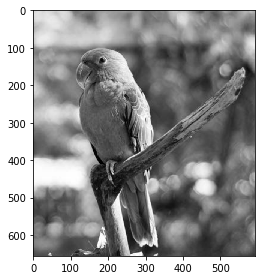

In [37]:
show(im, 4)

## Operador inverso o negativo

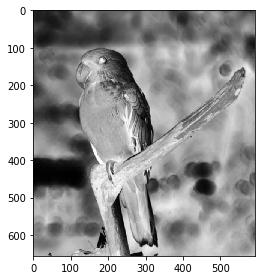

In [38]:
inverted = 255 - im
show(inverted, 4)

## Operador Umbral

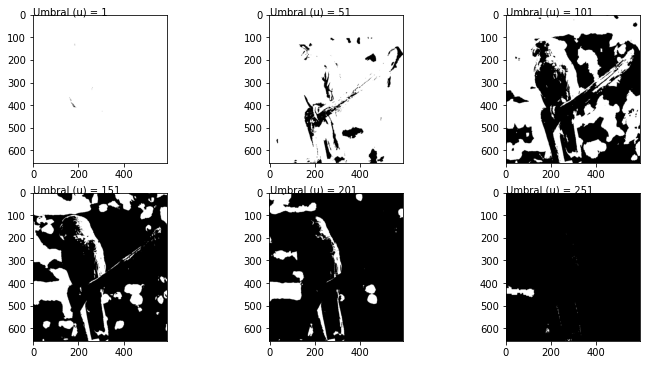

In [56]:
fig = plt.figure(figsize = (12, 6))
i = 0

for u in range(1, 255, 50):
  a = fig.add_subplot(2, 3, i + 1)
  i += 1

  aux = im.copy()
  aux[aux <= u] = 0
  aux[aux > u] = 255

  # Inverso 
  # aux = 255 - aux

  plt.imshow(aux)
  plt.text(0, 0, f"Umbral (u) = {u}")

plt.show()

## Operador Intervalo de Umbral binario

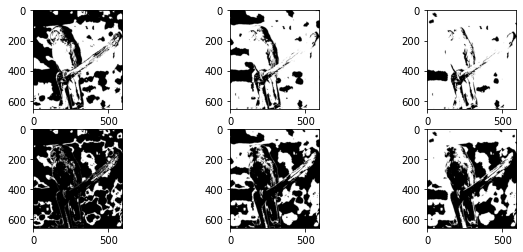

In [63]:
fig = plt.figure(figsize = (10, 4))
i = 0

for u1 in range(50, 128, 50):
  for u2 in range( 128, 254, 50):
    a = fig.add_subplot(2, 3, i + 1)
    i += 1

    aux = im.copy()
    aux[(aux > u2) | (aux < u1)] = 0
    aux[(aux >= u1) & (aux <= u2)] = 255

    # Inverso
    # aux = 255 - aux
    
    plt.imshow(aux)
plt.show()

# Operador Interalo de Umbral Gris

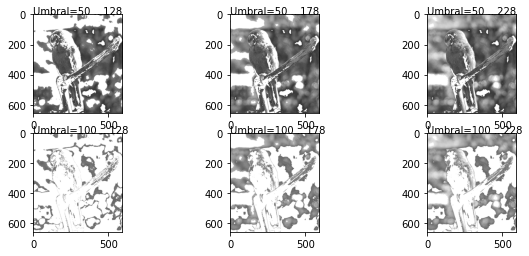

In [86]:
fig = plt.figure(figsize = (10, 4))
i = 0

for u1 in range(50, 128, 50):
  for u2 in range(128, 254, 50):
    a = fig.add_subplot(2, 3, i + 1)
    i += 1

    aux = im.copy()
    aux[(aux < u1) | (aux > u2)] = 255

    # Inverso
    # aux = 255 - aux

    plt.text(0, 0, f"Umbral={u1} .. {u2}")
    plt.imshow(aux)

# Operador de extensión

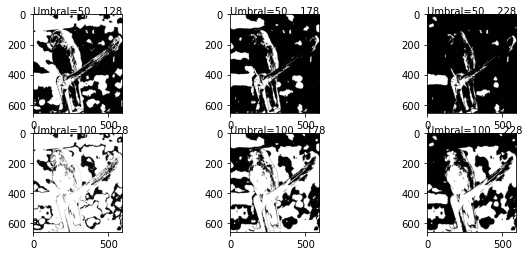

In [87]:
fig = plt.figure(figsize = (10, 4))
i = 0

for u1 in range(50, 128, 50):
  for u2 in range( 128, 254, 50):
    a = fig.add_subplot(2, 3, i + 1)
    i += 1

    aux = im.copy()

    aux[(aux > u2) | (aux < u1)] = 255

    idx = (aux >= u1) & (aux <= u2)
    aux[idx] = 255 * (aux[idx] - u1) / (u2 - u1)
    
    # Inverso
    # aux = 255 - aux
    
    plt.text(0, 0, f"Umbral={u1} .. {u2}")
    plt.imshow(aux)
plt.show()